### Problem Statement :
In the highly competitive and diverse restaurant industry, understanding market segmentation is crucial for strategic decision-making, tailored marketing, and optimizing customer satisfaction. The Zomato dataset, encompassing a wide range of features including restaurant locations, cuisines, pricing, customer ratings, and more, presents an opportunity to deeply analyze market dynamics. However, the complexity and varied nature of this data pose a significant challenge. The objective is to effectively segment restaurants using appropriate data analysis and clustering techniques, such as K-Means and DBSCAN. This segmentation aims to uncover hidden patterns and distinct categories within the restaurant market, facilitating more informed business strategies, enhanced customer targeting, and improved service offerings. The challenge lies in accurately capturing the nuanced relationships within the data and translating these insights into actionable business strategies.

Steps to follow: 
1. Data Collection and Understanding
2. Exploratory Data Analysis
3. Feature selection and data preprocessing
4. Model Selection
5. Model training and optimisation
6. Model analysis

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
df=pd.read_csv('zomato.csv',encoding='latin-1')

## Exploratory Data Analysis

In [7]:
df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [8]:
df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')

In [9]:
df.info()
#object can be categorical , interger or text data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

In [10]:
df.describe()

,Restaurant ID,Country Code,Longitude,Latitude,Average Cost for two,Price range,Aggregate rating,Votes
count,9.551000e+03,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000
mean,9.051128e+06,18.365616,64.126574,25.854381,1199.210763,1.804837,2.666370,156.909748
std,8.791521e+06,56.750546,41.467058,11.007935,16121.183073,0.905609,1.516378,430.169145
min,5.300000e+01,1.000000,-157.948486,-41.330428,0.000000,1.000000,0.000000,0.000000
25%,3.019625e+05,1.000000,77.081343,28.478713,250.000000,1.000000,2.500000,5.000000
50%,6.004089e+06,1.000000,77.191964,28.570469,400.000000,2.000000,3.200000,31.000000
75%,1.835229e+07,1.000000,77.282006,28.642758,700.000000,2.000000,3.700000,131.000000
max,1.850065e+07,216.000000,174.832089,55.976980,800000.000000,4.000000,4.900000,10934.000000


In [12]:
df.isnull().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

In [13]:
# 9 missing values in cuisine

In [14]:
[feature for feature in df.columns if df[feature].isnull().sum()>1] 
#using list comprehension to find column with null values

['Cuisines']

<AxesSubplot:>

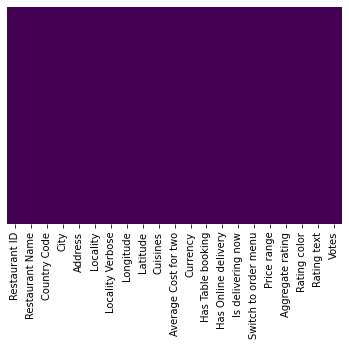

In [15]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [16]:
df_country=pd.read_excel('Country-Code.xlsx')

In [17]:
df_country.head()

,Country Code,Country
0,1,India
1,14,Australia
2,30,Brazil
3,37,Canada
4,94,Indonesia


In [18]:
final_df=pd.merge(df,df_country,on='Country Code',how='left')

In [19]:
final_df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Yes,No,No,No,3,4.8,Dark Green,Excellent,314,Phillipines
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Yes,No,No,No,3,4.5,Dark Green,Excellent,591,Phillipines
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Yes,No,No,No,4,4.4,Green,Very Good,270,Phillipines
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,No,No,No,No,4,4.9,Dark Green,Excellent,365,Phillipines
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Yes,No,No,No,4,4.8,Dark Green,Excellent,229,Phillipines


In [20]:
final_df.dtypes

Restaurant ID             int64
Restaurant Name          object
Country Code              int64
City                     object
Address                  object
Locality                 object
Locality Verbose         object
Longitude               float64
Latitude                float64
Cuisines                 object
Average Cost for two      int64
Currency                 object
Has Table booking        object
Has Online delivery      object
Is delivering now        object
Switch to order menu     object
Price range               int64
Aggregate rating        float64
Rating color             object
Rating text              object
Votes                     int64
Country                  object
dtype: object

In [21]:
final_df.Country.value_counts()

India             8652
United States      434
United Kingdom      80
Brazil              60
UAE                 60
South Africa        60
New Zealand         40
Turkey              34
Australia           24
Phillipines         22
Indonesia           21
Singapore           20
Qatar               20
Sri Lanka           20
Canada               4
Name: Country, dtype: int64

In [22]:
country_value=final_df.Country.value_counts().values

In [23]:
country_names=final_df.Country.value_counts().index 

([<matplotlib.patches.Wedge at 0x1be0aa028b0>,
 [Text(-1.0829742700952103, 0.19278674827836725, 'India'),
  Text(1.077281715838356, -0.22240527134123297, 'United States'),
  Text(1.0995865153823035, -0.03015783794312073, 'United Kingdom')],
 [Text(-0.590713238233751, 0.10515640815183668, '94.39%'),
  Text(0.5876082086391032, -0.12131196618612707, '4.73%'),
  Text(0.5997744629358018, -0.01644972978715676, '0.87%')])

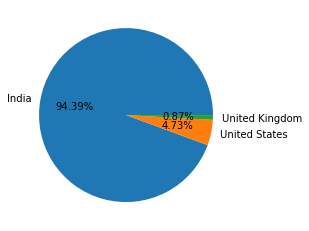

In [24]:
#top 3 country
plt.pie(country_value[:3],labels=country_names[:3],autopct='%1.2f%%')

In [25]:
final_df.groupby(['Aggregate rating','Rating color','Rating text']).size()

Aggregate rating  Rating color  Rating text
0.0               White         Not rated      2148
1.8               Red           Poor              1
1.9               Red           Poor              2
2.0               Red           Poor              7
2.1               Red           Poor             15
2.2               Red           Poor             27
2.3               Red           Poor             47
2.4               Red           Poor             87
2.5               Orange        Average         110
2.6               Orange        Average         191
2.7               Orange        Average         250
2.8               Orange        Average         315
2.9               Orange        Average         381
3.0               Orange        Average         468
3.1               Orange        Average         519
3.2               Orange        Average         522
3.3               Orange        Average         483
3.4               Orange        Average         498
3.5               Ye

In [26]:
rating_df=final_df.groupby(['Aggregate rating','Rating color','Rating text']).size().reset_index().rename(columns={0:'Rating Count'})
#convert to dataframe using reset_index

In [27]:
rating_df

,Aggregate rating,Rating color,Rating text,Rating Count
0,0.0,White,Not rated,2148
1,1.8,Red,Poor,1
2,1.9,Red,Poor,2
3,2.0,Red,Poor,7
4,2.1,Red,Poor,15
5,2.2,Red,Poor,27
6,2.3,Red,Poor,47
7,2.4,Red,Poor,87
8,2.5,Orange,Average,110
9,2.6,Orange,Average,191


In [28]:
# obs: max people have not given rating
# rating 4.5 to 4.9 --> excellent
# 4.0 - 4.5 --> very good
# 3.5 -3.9 --> Good
# 2.5 to 3.4 --> Average
#1.8 to 2.4 --> poor

<AxesSubplot:xlabel='Aggregate rating', ylabel='Rating Count'>

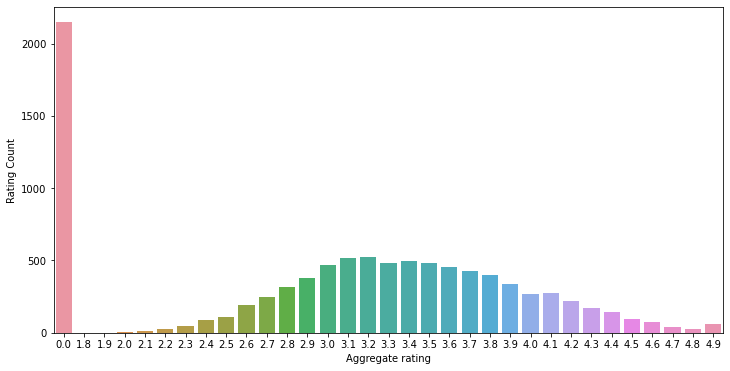

In [29]:
plt.rcParams['figure.figsize']=(12,6)
sns.barplot(x='Aggregate rating',y='Rating Count',data=rating_df)

<AxesSubplot:xlabel='Aggregate rating', ylabel='Rating Count'>

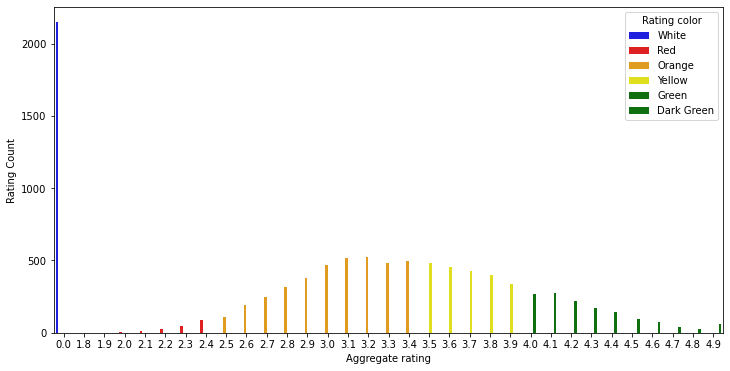

In [30]:
sns.barplot(x='Aggregate rating',y='Rating Count',hue='Rating color',data=rating_df,palette=['Blue','Red','Orange','Yellow','Green','Green'])

In [31]:
# max rating is bw 2.5 and 3.4 orange color

<AxesSubplot:xlabel='Rating color', ylabel='count'>

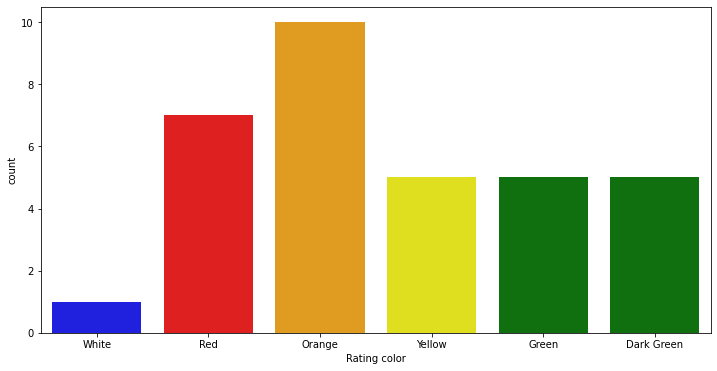

In [32]:
sns.countplot(x='Rating color',data=rating_df,palette=['Blue','Red','Orange','Yellow','Green','Green'])

In [33]:
#country that has given 0 rating
final_df[final_df['Aggregate rating']==0].groupby('Country').size()

Country
Brazil               5
India             2139
United Kingdom       1
United States        3
dtype: int64

In [34]:
#max rating ie 0 is indian customer

In [35]:
#find which curency is used by which country
final_df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes', 'Country'],
      dtype='object')

In [36]:
final_df[['Currency','Country']].groupby(['Currency','Country']).size().reset_index()

,Currency,Country,0
0,Botswana Pula(P),Phillipines,22
1,Brazilian Real(R$),Brazil,60
2,Dollar($),Australia,24
3,Dollar($),Canada,4
4,Dollar($),Singapore,20
5,Dollar($),United States,434
6,Emirati Diram(AED),UAE,60
7,Indian Rupees(Rs.),India,8652
8,Indonesian Rupiah(IDR),Indonesia,21
9,NewZealand($),New Zealand,40


In [37]:
# which country has online delivery options
final_df[final_df['Has Online delivery']=='Yes'].groupby('Country').size()

Country
India    2423
UAE        28
dtype: int64

In [38]:
final_df[final_df['Has Online delivery']=='Yes'].Country.value_counts()

India    2423
UAE        28
Name: Country, dtype: int64

In [39]:
final_df[['Has Online delivery','Country']].groupby(['Has Online delivery','Country']).size().reset_index()

,Has Online delivery,Country,0
0,No,Australia,24
1,No,Brazil,60
2,No,Canada,4
3,No,India,6229
4,No,Indonesia,21
5,No,New Zealand,40
6,No,Phillipines,22
7,No,Qatar,20
8,No,Singapore,20
9,No,South Africa,60


In [40]:
# observation : Online delivery are available only in India and UAE

In [41]:
# let us create a pie chart for cities distribution
final_df.City.value_counts()

New Delhi           5473
Gurgaon             1118
Noida               1080
Faridabad            251
Ghaziabad             25
                    ... 
Panchkula              1
Mc Millan              1
Mayfield               1
Macedon                1
Vineland Station       1
Name: City, Length: 141, dtype: int64

In [42]:
final_df.City.value_counts().index

Index(['New Delhi', 'Gurgaon', 'Noida', 'Faridabad', 'Ghaziabad',
       'Bhubaneshwar', 'Amritsar', 'Ahmedabad', 'Lucknow', 'Guwahati',
       ...
       'Ojo Caliente', 'Montville', 'Monroe', 'Miller', 'Middleton Beach',
       'Panchkula', 'Mc Millan', 'Mayfield', 'Macedon', 'Vineland Station'],
      dtype='object', length=141)

In [43]:
final_df.City.value_counts().values

array([5473, 1118, 1080,  251,   25,   21,   21,   21,   21,   21,   20,
         20,   20,   20,   20,   20,   20,   20,   20,   20,   20,   20,
         20,   20,   20,   20,   20,   20,   20,   20,   20,   20,   20,
         20,   20,   20,   20,   20,   20,   20,   20,   20,   20,   20,
         20,   20,   20,   20,   20,   20,   20,   20,   20,   20,   20,
         20,   20,   20,   20,   20,   20,   20,   20,   20,   20,   20,
         20,   20,   20,   20,   20,   20,   20,   20,   20,   20,   20,
         18,   18,   16,   14,   11,    6,    4,    4,    3,    3,    2,
          2,    2,    2,    2,    2,    2,    2,    1,    1,    1,    1,
          1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,
          1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,
          1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,
          1,    1,    1,    1,    1,    1,    1,    1,    1], dtype=int64)

([<matplotlib.patches.Wedge at 0x1be0b14f5b0>,
 [Text(-0.6145352824185932, 0.9123301960708633, 'New Delhi'),
  Text(0.0623675251198054, -1.0982305276263407, 'Gurgaon'),
  Text(0.8789045225625368, -0.6614581167535246, 'Noida'),
  Text(1.0922218418223437, -0.13058119407559224, 'Faridabad'),
  Text(1.099946280005612, -0.010871113182029924, 'Ghaziabad')],
 [Text(-0.3352010631374145, 0.497634652402289, '68.87%'),
  Text(0.0340186500653484, -0.5990348332507311, '14.07%'),
  Text(0.47940246685229276, -0.36079533641101336, '13.59%'),
  Text(0.5957573682667329, -0.07122610585941394, '3.16%'),
  Text(0.5999706981848791, -0.005929698099289049, '0.31%')])

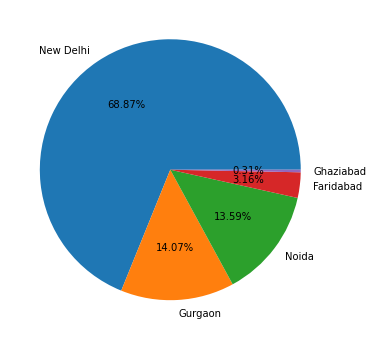

In [44]:
plt.pie(final_df.City.value_counts().values[:5],labels=final_df.City.value_counts().index[:5],autopct='%1.2f%%')
#top 5 cities

([<matplotlib.patches.Wedge at 0x1be0b1ad370>,
 [Text(0.7383739846958008, 0.8153550507137645, 'North Indian'),
  Text(-0.5794679314239953, 0.9349956772366362, 'North Indian, Chinese'),
  Text(-1.067309479615702, 0.26617752482593154, 'Chinese'),
  Text(-1.0185984499802057, -0.4152796620326146, 'Fast Food'),
  Text(-0.5935788454809928, -0.9261015895664211, 'North Indian, Mughlai'),
  Text(-0.005887079599915552, -1.0999842463843672, 'Cafe'),
  Text(0.4842062514572988, -0.9876964645323336, 'Bakery'),
  Text(0.808736477166136, -0.7456174022251013, 'North Indian, Mughlai, Chinese'),
  Text(1.0055375294202338, -0.44597564611473206, 'Bakery, Desserts'),
  Text(1.090298995560443, -0.14576728123927227, 'Street Food')],
 [Text(0.4027494461977095, 0.4447391185711442, '26.58%'),
  Text(-0.316073417140361, 0.5099976421290743, '14.51%'),
  Text(-0.5821688070631101, 0.14518774081414446, '10.05%'),
  Text(-0.5555991545346576, -0.22651617929051704, '10.05%'),
  Text(-0.32377027935326874, -0.505146321581

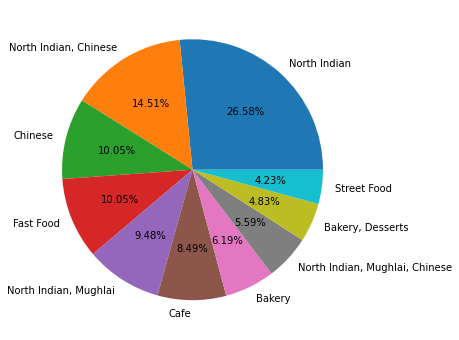

In [45]:
# top 10 cuisines
plt.pie(final_df.Cuisines.value_counts().values[:10],labels=final_df.Cuisines.value_counts().index[:10],autopct='%1.2f%%')


In [46]:
# top 5 restarant in each city
final_df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes', 'Country'],
      dtype='object')

In [47]:
#find all restaurants operating in each city of india
final_df[final_df['Country']=='India'].groupby(['Restaurant Name','City']).size().reset_index().head()

,Restaurant Name,City,0
0,Let's Burrrp,Noida,1
1,#45,Mangalore,1
2,#Dilliwaala6,Puducherry,1
3,#InstaFreeze,New Delhi,1
4,#OFF Campus,New Delhi,1


In [49]:
final_df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes', 'Country'],
      dtype='object')

## Feature Selection and preprocessing

In [50]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [52]:
subset_df = final_df[['Restaurant Name', 'City', 'Cuisines','Average Cost for two','Price range','Aggregate rating']]

In [53]:
subset_df.dtypes

Restaurant Name          object
City                     object
Cuisines                 object
Average Cost for two      int64
Price range               int64
Aggregate rating        float64
dtype: object

In [55]:
# Convert categorical data into numeric using one-hot encoding
df_onehot = pd.get_dummies(subset_df[['City', 'Cuisines']], prefix="", prefix_sep="")

In [56]:
# Standardize the numeric data
scaler = StandardScaler()
scaled_features = scaler.fit_transform(subset_df[['Average Cost for two', 'Price range', 'Aggregate rating']])

In [57]:
# Combine the scaled and one-hot encoded features
X = np.hstack([scaled_features, df_onehot])

## Model Selection, Training and Evaluation

In [58]:
# Use the Elbow Method to find the optimal number of clusters
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

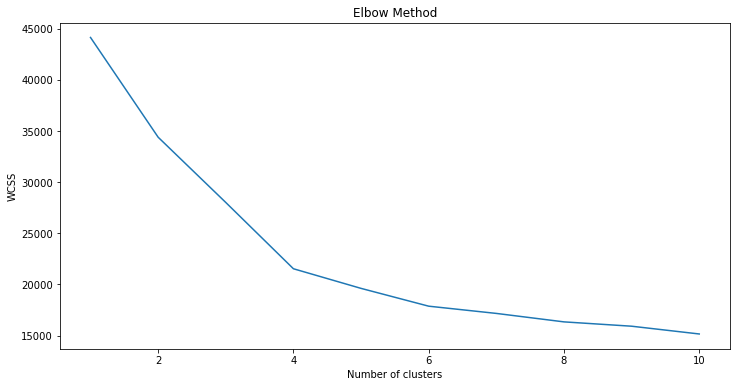

In [59]:
# Plot the results of the elbow method
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [60]:
# Choose the number of clusters (k) based on the elbow plot and fit the model
k = 6  
kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=300, n_init=10, random_state=0)
cluster_labels = kmeans.fit_predict(X)

In [61]:
# Add the cluster labels to your original dataframe
subset_df['Cluster'] = cluster_labels

C:\Users\vaish\AppData\Local\Temp/ipykernel_35648/3333238371.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset_df['Cluster'] = cluster_labels


In [62]:
# Analyze the clusters
print(subset_df.groupby('Cluster').mean())


         Average Cost for two  Price range  Aggregate rating
Cluster                                                     
0                  601.224640     2.000000          3.377167
1                  330.484324     1.220870          0.000000
2                 1452.082389     3.301751          3.784140
3               261000.000000     3.000000          4.400000
4                  285.186953     1.000000          3.238885
5               800000.000000     3.000000          4.350000


In [ ]:
#To visualize the clusters from the restaurant segmentation model, I am using dimensionality reduction techniques like PCA (Principal Component Analysis) 

In [63]:
from sklearn.decomposition import PCA


In [64]:
# Reduce the dimensions to 2 for visualization using PCA
pca = PCA(n_components=2)
reduced_features = pca.fit_transform(X)



In [65]:
# Creating a DataFrame for the reduced features and the cluster labels
reduced_df = pd.DataFrame(reduced_features, columns=['PC1', 'PC2'])
reduced_df['Cluster'] = cluster_labels



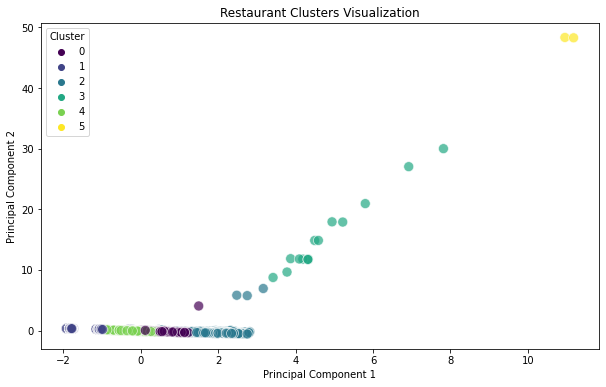

In [66]:
# Plotting
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PC1', y='PC2', hue='Cluster', data=reduced_df, palette='viridis', s=100, alpha=0.7)
plt.title('Restaurant Clusters Visualization')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.show()

In [67]:
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score


In [68]:
# Silhouette Score
silhouette_avg = silhouette_score(X, cluster_labels)
print("Silhouette Score: ", silhouette_avg)

Silhouette Score:  0.19824152584800608


In [69]:
# Calinski-Harabasz Index
calinski_harabasz = calinski_harabasz_score(X, cluster_labels)
print("Calinski-Harabasz Index: ", calinski_harabasz)

Calinski-Harabasz Index:  2806.9750194575754


In [70]:
# Davies-Bouldin Index
davies_bouldin = davies_bouldin_score(X, cluster_labels)
print("Davies-Bouldin Index: ", davies_bouldin)

Davies-Bouldin Index:  1.3624404438901632


### K Means Model Evaluation : 
Silhouette Score (0.1982): This score ranges from -1 to 1. A score near 1 indicates that the clusters are well apart from each other and clearly distinguished. A score near 0 represents overlapping clusters. Your score of approximately 0.198 suggests that the clusters are not very distinct and there is some overlap or the clusters are not very cohesive. While this isn't a strongly negative score, it does indicate that there might be room for improvement in terms of how distinct your clusters are.

Calinski-Harabasz Index (2806.975): This index is higher when clusters are dense and well-separated, which is generally desired. A high value typically indicates a model with better-defined clusters. Your score seems quite high, suggesting that, in terms of variance ratio, your clustering has performed well. This means that there is a good ratio between the within-cluster dispersion and the between-cluster dispersion.

Davies-Bouldin Index (1.3624): Ideally, the value of this index should be as low as possible. Lower values mean better separation between the clusters. A value of 1.3624 suggests moderate separation between the clusters. It's not particularly high, but like the Silhouette Score, it indicates there's room for improvement in the separation of your clus

In [71]:
# Trying different values of k
sum_of_squared_distances = []
K = range(1, 15)  # You can change the range based on your dataset and needs
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(X)
    sum_of_squared_distances.append(km.inertia_)


C:\Users\vaish\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\vaish\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\vaish\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\vaish\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of

In [72]:
sum_of_squared_distances

[44144.80588420069,
 34391.431878994685,
 27456.68281689614,
 21615.39754324729,
 19609.863403682848,
 17869.56760484106,
 17072.78486326852,
 16421.764796147654,
 15903.314510739072,
 15137.563980947489,
 14835.852411173291,
 14425.054750863404,
 14058.998195098704,
 13751.235831600234]

In [74]:
# Creating the KMeans model with 14 clusters
kmeans = KMeans(n_clusters=14, random_state=42)

# Fitting the model
kmeans.fit(X)

# Getting the cluster labels for each data point
cluster_labels = kmeans.labels_

# You can add these labels to your original DataFrame if you want to analyze which data points fall into which cluster
subset_df['Cluster'] = cluster_labels

C:\Users\vaish\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\vaish\AppData\Local\Temp/ipykernel_35648/87057610.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset_df['Cluster'] = cluster_labels


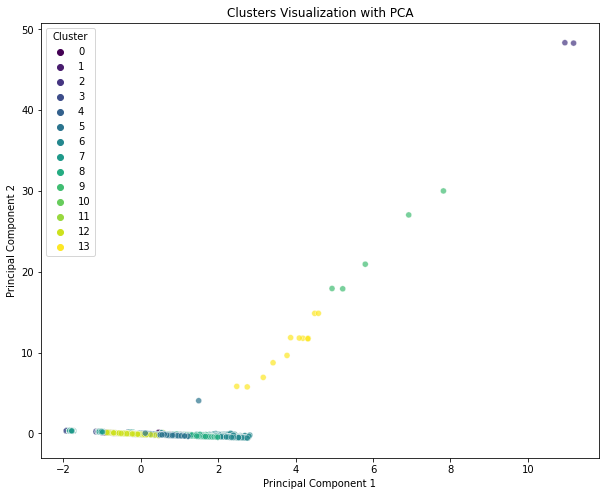

In [75]:
# Apply PCA and reduce the dimensions to 2
pca = PCA(n_components=2)
principal_components = pca.fit_transform(X)

# Creating a DataFrame for the PCA results and the cluster labels
pca_df = pd.DataFrame(data = principal_components, columns = ['principal component 1', 'principal component 2'])
pca_df['Cluster'] = cluster_labels

# Plotting
plt.figure(figsize=(10, 8))
sns.scatterplot(x='principal component 1', y='principal component 2', hue='Cluster', data=pca_df, palette='viridis', legend="full", alpha=0.7)
plt.title('Clusters Visualization with PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.show()

In [76]:
# Silhouette Score
silhouette_avg = silhouette_score(X, cluster_labels)
print("Silhouette Score: ", silhouette_avg)

Silhouette Score:  0.17045310496074081


In [77]:
from sklearn.cluster import DBSCAN


In [78]:
# Standardizing the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [79]:
dbscan = DBSCAN(eps=0.5, min_samples=5)
clusters = dbscan.fit_predict(X_scaled)

In [80]:
# We'll use PCA for visualization purposes
pca = PCA(n_components=2)
principal_components = pca.fit_transform(X_scaled)

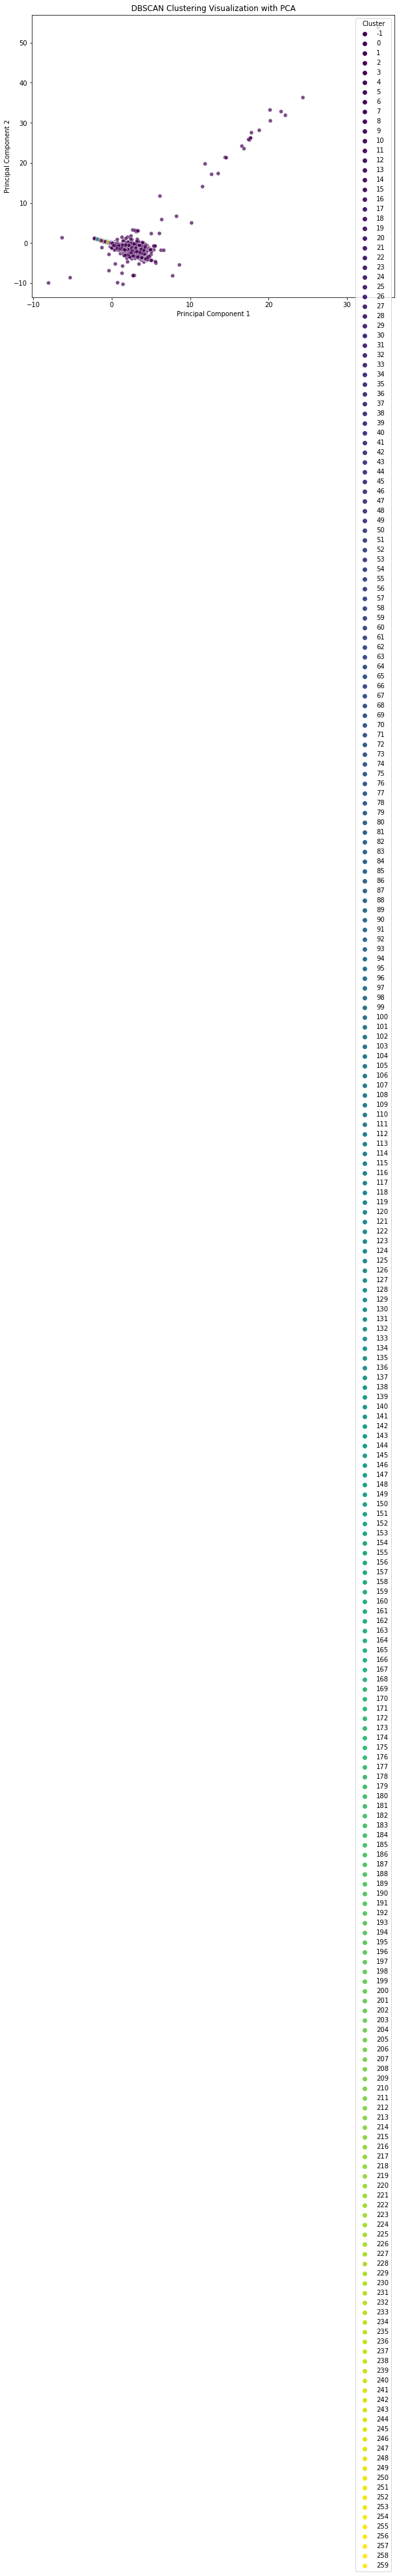

In [81]:
# Creating a DataFrame for the PCA results
pca_df = pd.DataFrame(data = principal_components, columns = ['principal component 1', 'principal component 2'])
pca_df['Cluster'] = clusters

# Plotting
plt.figure(figsize=(10, 8))
sns.scatterplot(x='principal component 1', y='principal component 2', hue='Cluster', data=pca_df, palette='viridis', legend="full", alpha=0.7)
plt.title('DBSCAN Clustering Visualization with PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.show()

In [82]:
# Filter out noise (-1 labels)
valid_labels_mask = clusters != -1
valid_labels = clusters[valid_labels_mask]
valid_points = X_scaled[valid_labels_mask]

# Check if we have enough clusters to calculate metrics (at least 1 cluster, not counting noise)
if len(set(valid_labels)) > 1:
    # Calculate metrics
    silhouette_avg = silhouette_score(valid_points, valid_labels)
    calinski_harabasz = calinski_harabasz_score(valid_points, valid_labels)
    davies_bouldin = davies_bouldin_score(valid_points, valid_labels)

    print("Silhouette Score: ", silhouette_avg)
    print("Calinski-Harabasz Index: ", calinski_harabasz)
    print("Davies-Bouldin Index: ", davies_bouldin)
else:
    print("Not enough clusters to calculate metrics (excluding noise).")

Silhouette Score:  0.8605987037731225
Calinski-Harabasz Index:  44346.956146149365
Davies-Bouldin Index:  0.18501227451395535


#### DBSCAN EVALUTION : 
Silhouette Score (0.8606): This is a high score, close to 1, which indicates that the clusters are well separated and that data points are, on average, closer to the members of their own cluster than to members of other clusters. This suggests a good degree of separation and cohesion within the clusters.

Calinski-Harabasz Index (44346.96): This is a high score, which suggests that the clusters are dense and well-separated. This index is particularly sensitive to the number of clusters and the definition of those clusters, so a high score here is a positive indicator of the model's performance.

Davies-Bouldin Index (0.185): A lower score is better for this index, and your score is quite low. This suggests that the average distance between each cluster and its most similar one is large, which again is a good indicator of well-defined clusters.

### OVERALL MODEL EVALUTION
Silhouette Score:

DBSCAN's higher Silhouette Score suggests that it is more effective in creating clusters where data points are closer to their own cluster's centroid than to centroids of other clusters. This indicates good separation and homogeneity within clusters.
The fact that DBSCAN outperforms K-Means in this metric may imply that the clusters in your dataset are not spherical or evenly sized, which aligns more with DBSCAN's capabilities to handle varying cluster shapes and densities.
Calinski-Harabasz Index:

The higher Calinski-Harabasz Index for DBSCAN indicates that the clusters it forms are denser and more separated than those formed by K-Means. This suggests that DBSCAN is able to identify more distinct groups in your data.
Given DBSCAN's ability to handle noise and identify outliers, a high score here reinforces its effectiveness in managing a diverse dataset with potentially complex cluster structures.
Davies-Bouldin Index:

Although DBSCAN scores lower in the Davies-Bouldin Index compared to K-Means, it's important to note that this metric favors well-separated clusters. A lower score in DBSCAN still indicates effective separation, but it might not be as pronounced as with K-Means.
K-Means, which assumes equally sized, spherical clusters, might naturally tend to have a lower Davies-Bouldin Index if your dataset somewhat aligns with these assumptions, even if the clusters are not as well-defined or dense.
Overall Interpretation:

DBSCAN appears to be more effective in capturing the natural structure of your data, especially if the dataset contains complex, irregularly shaped clusters or has noise/outliers.
K-Means might still provide a good structure if the data has distinct, roughly spherical clusters, but it might oversimplify or miss nuances in more complex datasets.
The choice between DBSCAN and K-Means should also consider the specific needs of your analysis. For example, if interpreting cluster shapes and handling outliers is important, DBSCAN's strengths become more relevant.
Finally, remember that these metrics are just quantitative measures. Qualitative assessment, such as how well the clusters align with domain knowledge or specific business goals, is equally important in evaluating the success of a clustering model.

## Conclusion :

#### Data Understanding and Preparation:

The project started with a thorough understanding of the Zomato dataset, which included a diverse range of features like restaurant location, cuisine, cost, ratings, and more. Proper preprocessing, including handling missing values and scaling, was crucial to prepare the dataset for effective clustering.

#### Model Selection and Performance:

Among the clustering techniques applied, DBSCAN emerged as the more effective model, particularly in capturing the complex, non-linear relationships and varied densities in the data. This was evidenced by the higher Silhouette Score and Calinski-Harabasz Index compared to K-Means.
K-Means also provided valuable insights, especially in identifying distinct, roughly spherical clusters, although it was somewhat less effective in capturing the intricate structures within the data.

#### Insights and Implications:

The clustering results offered significant insights into the restaurant market segmentation. Clusters identified could represent various market segments based on factors like cuisine type, pricing, location, and customer preferences.
These insights can assist stakeholders in making informed decisions on marketing strategies, location planning, menu design, and customer targeting.

#### Strategic Value:

The segmentation model can be used to identify niche markets, optimize service offerings, and enhance customer satisfaction by understanding and catering to specific preferences and needs.
For new entrants or existing restaurants looking to expand, the model offers guidance on positioning and competitive strategies.
Limitations and Future Scope:

While the models provided valuable insights, they have limitations, such as DBSCAN's sensitivity to parameter settings and K-Means' assumptions about cluster shapes.
Future enhancements could include exploring more sophisticated models, integrating additional data sources for richer insights, or applying the model to dynamic, real-time datasets for ongoing market analysis.

#### Business Impact and Applications:

The project has potential applications in strategic business planning, targeted marketing campaigns, and enhancing customer experience.By understanding customer segments and market dynamics, businesses can tailor their offerings more effectively, leading to potential increases in customer loyalty and revenue.

In summary, this restaurant segmentation project has successfully leveraged clustering techniques to uncover meaningful patterns and segments within the restaurant industry. These insights are invaluable for strategic decision-making and offer a foundation for further analysis and refinement in the evolving landscape of the restaurant market.